In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from classes import *

In [2]:
DTYPE = np.float32

In [3]:
path = r'\Deep-Learning\datasets\digits'
path_train = path + r'\train.csv'
path_test = path + r'\test.csv'

In [4]:
data_train = np.array(pd.read_csv(path_train))
data_test = np.array(pd.read_csv(path_test))

In [5]:
X_train = data_train[:, 1:] / 255.0
X_test = data_test / 255.0

In [6]:
X_train = X_train.astype(DTYPE)
X_test = X_test.astype(DTYPE)

In [7]:
model = AutoEncoder(
    encoder_neurons=(X_train.shape[1], 64),
    encoder_activations=[ReLU()],
    decoder_neurons=(64, X_train.shape[1]),
    decoder_activations=[Sigmoid()]
)

In [8]:
model.compile(
    loss=BinaryCrossEntropy(),
    optimizer=Adam(),
    accuracy=BinaryAccuracy()
)

In [9]:
model.train(
    x=X_train,
    y=X_train,
    epochs=10,
    batch_size=64,
    verbose=True,
    print_every=2,
    x_test=X_test,
    y_test=X_test
)

Epoch: 2, Loss: 90.10381397812111, Acc: 0.0, Test Loss: 79.93916964446082, Test Acc: 0.0
Epoch: 4, Loss: 68.4868720212115, Acc: 0.0, Test Loss: 66.94438305242106, Test Acc: 0.0
Epoch: 6, Loss: 63.6616280310692, Acc: 0.0, Test Loss: 62.77933055316779, Test Acc: 0.0
Epoch: 8, Loss: 61.115777063171315, Acc: 0.0, Test Loss: 60.89069098233016, Test Acc: 0.0
Epoch: 10, Loss: 60.11083265337171, Acc: 0.0, Test Loss: 60.066597040834246, Test Acc: 0.0


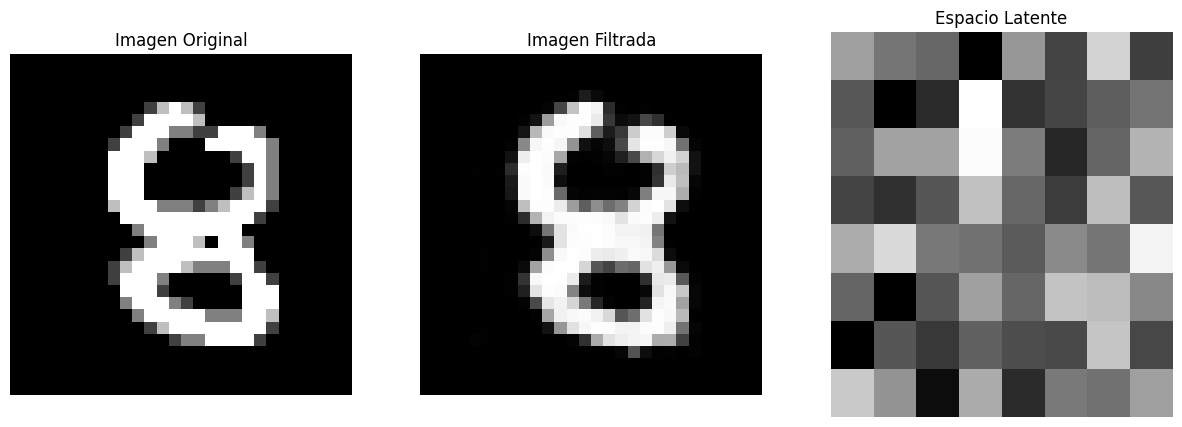

In [ ]:
random_idx = np.random.randint(0, X_test.shape[0])
random_image = X_test[random_idx]

filtered, latent = model.forward(random_image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(random_image.reshape(28, 28), cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(filtered.reshape(28, 28), cmap='gray')
axes[1].set_title("Imagen Filtrada")
axes[1].axis("off")

axes[2].imshow(latent.reshape(8, 8), cmap='gray', aspect='auto')
axes[2].set_title("Espacio Latente")
axes[2].axis("off")

plt.show()